In [1]:
### libraries used in this script ###
import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.spatial
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import KDTree
#import imageio 
#import skimage.io as skio
#import PIL
from math import sqrt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import re
import statistics

__Read in Files__

In [54]:
##Gaussian Function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

##Fitting Function

def fitting(x_data, y_data, initial_guess, spot):
      # Initial parameter guess [A, mu, sigma]
    params, covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Extract the fitted parameters
    A_fit, mu_fit, sigma_fit = params
    y_plot=gaussian(x_plot, A_fit, mu_fit, sigma_fit)

    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, label="Data", alpha=0.5)
    plt.plot(x_plot, gaussian(x_plot, A_fit, mu_fit, sigma_fit), label="Fit", color='red')

    plt.title("Fitted Gaussian Distribution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(spot)
    plt.show
    return x_plot, y_plot, params, A_fit, sigma_fit

def fwhm(sigma_fit):
    val=(abs(sigma_fit*2.35482))*1000
    
    return(val)

#Measure Resolution
def Resolution_Measure(x_plot, y_plot, params, r1, r2):
    x=x_plot
    y=y_plot
    #y=gaussian(x_plot, A_fit, mu_fit, sigma_fit) ## needs to be array/data not function 

    
    column=['x','y']
    data={'x':x, 'y':y}
    df=pd.DataFrame(data)
    sd=np.std(df['y'])
    Half=df[(df['y'] > r1) & (df['y'] < r2)]
    HW2=Half.iloc[1,0]
    HW1=Half.iloc[0,0]
    print(Half)
    #print(HW1)
    Resolution=HW2-HW1

    return Resolution, df,sd

In [98]:
folder_path =r"Z:\All_Staff\Grandl Lab\Marie Cronin\Resolution Measure\OE\d3c2_TREK"
spots=[]

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        pattern = r"spot(\d+)"
        # Use re.search() to find the pattern in the filename
        match = re.search(pattern, filename)
        if match:
            # Extract the matched portion (i.e., "M" followed by the number)
            spot_and_number = match.group(0)
            df = pd.read_csv(file_path)
            name_list=[]
            for i in range(len(df)):
                name_list.append(spot_and_number)
            df['cell']=name_list
        #count+=1
            spots.append(df)
            
combined_spots = pd.concat(spots, ignore_index=True)

all = combined_spots.groupby('cell')
#print(cell)
# Iterate through each group and access the corresponding subset DataFrame
for cell, subset_df in all:
    print(f"Subset for cell {cell}:")
    print(subset_df)
    
    #df = pd.read_csv(file_path)

Subset for cell spot1:
    Distance_(microns)  Gray_Value   cell
0             0.000000      0.5000  spot1
1             0.014959      2.3992  spot1
2             0.029918      5.6708  spot1
3             0.044877      8.6296  spot1
4             0.059837      8.8169  spot1
5             0.074796      6.0576  spot1
6             0.089755      3.0185  spot1
7             0.104714      2.2881  spot1
8             0.119673      4.2963  spot1
9             0.134632     11.3333  spot1
10            0.149592     27.5556  spot1
11            0.164551     52.4280  spot1
12            0.179510     77.9444  spot1
13            0.194469     92.6132  spot1
14            0.209428     89.0329  spot1
15            0.224387     66.5926  spot1
16            0.239347     36.3292  spot1
17            0.254306     14.4856  spot1
18            0.269265      4.3333  spot1
19            0.284224      0.8519  spot1
20            0.299183      0.0000  spot1
21            0.314142      0.0000  spot1
22         

71.41930079005508
73.74913257722082
68.06274302890218
53.51487557577062
50.491332622778735
66.13226486983407
72.80379187950999
50.752984720183456
71.69719304642999
56.81403935122161
55.73481714314658
70.44149946134725
76.82511743601953
60.359902305879935
53.29611384307034
70.64991901148136
68.80596161633383
58.483198870932995
67.74582690674711
58.85896044587526
61.61593918761958
67.0180915284393
62.87049428352439
64.35491238336569
58.52985459982177
68.62965691580905


C:\Users\mec117\AppData\Local\Temp\ipykernel_14716\1251633494.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


101.02454571792536
75.98342945308009
65.27579414549673


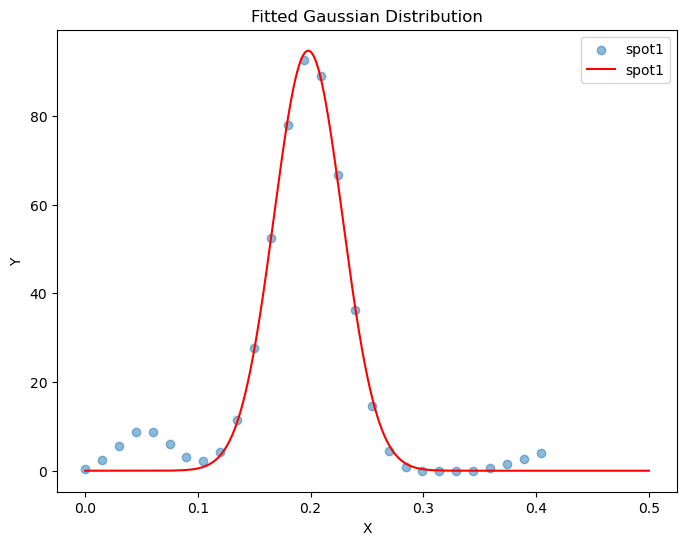

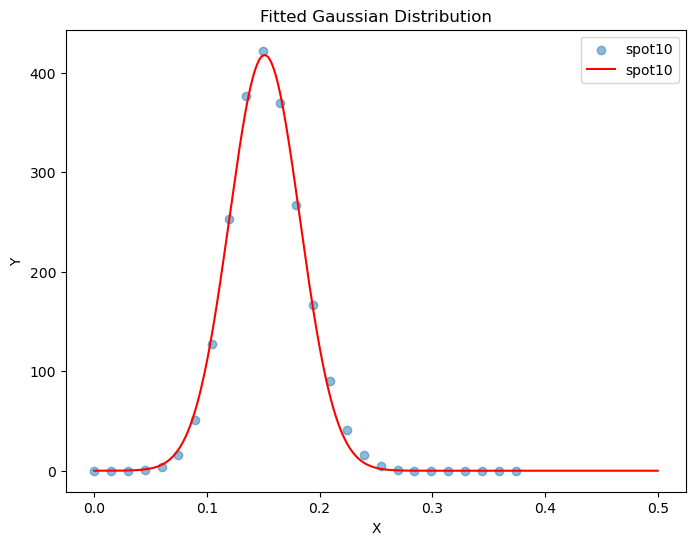

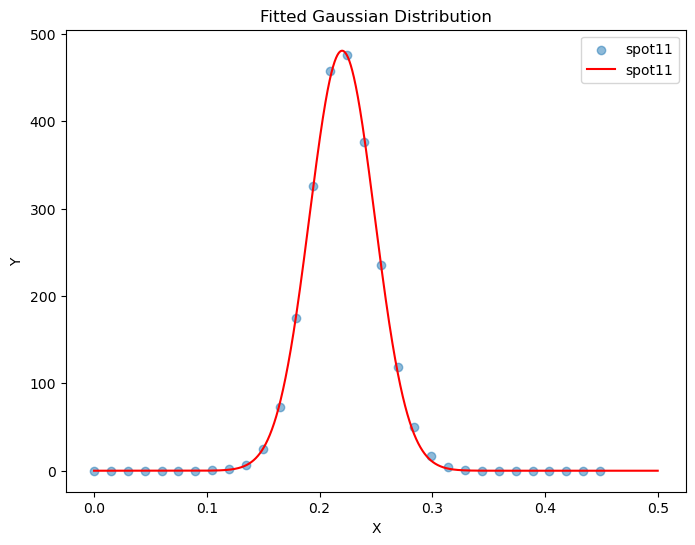

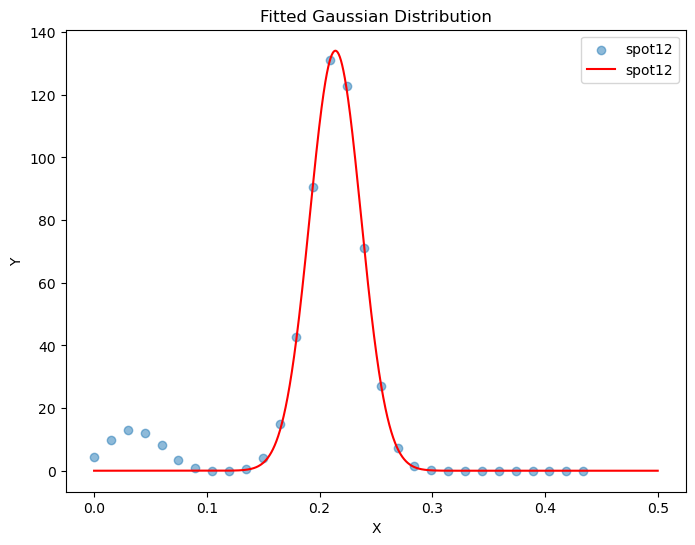

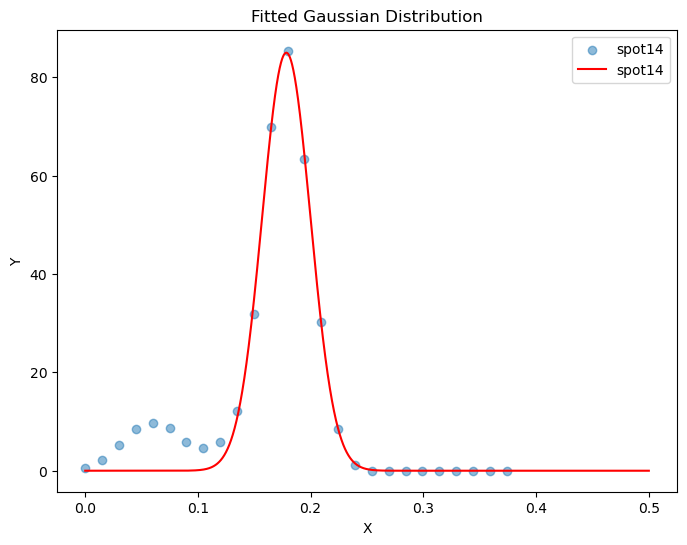

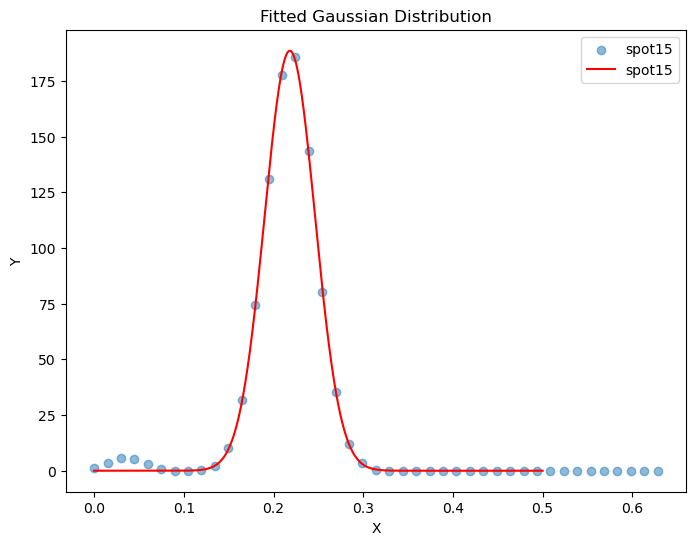

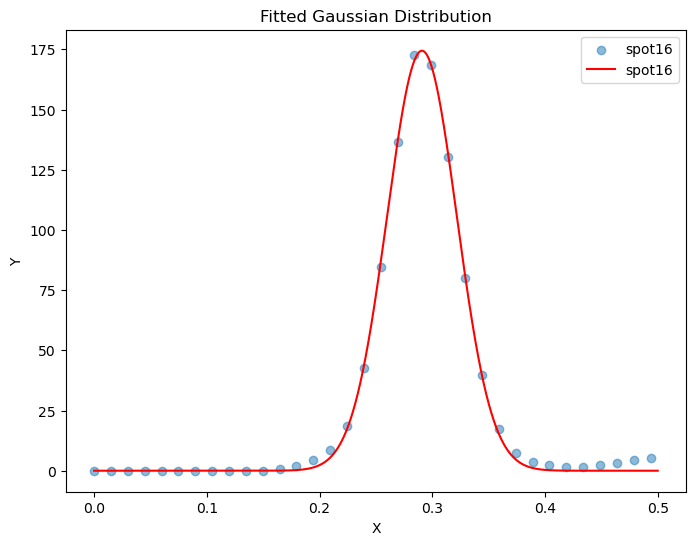

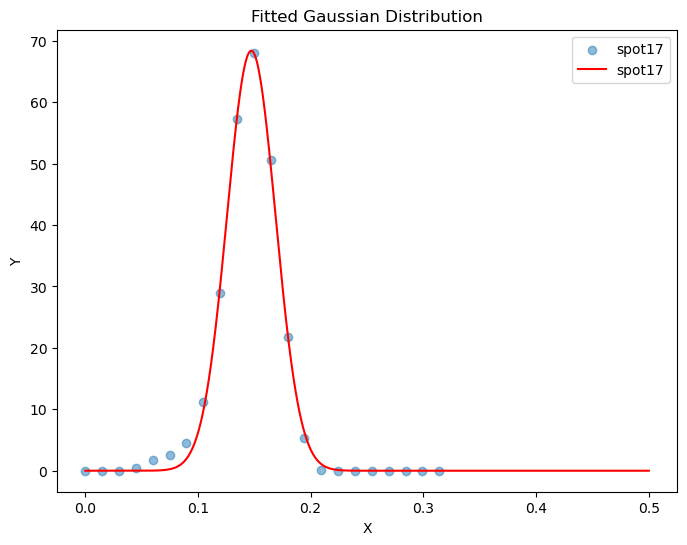

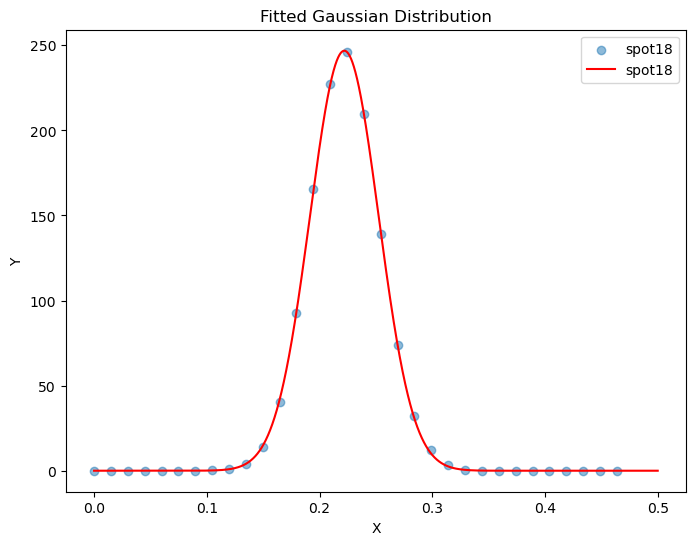

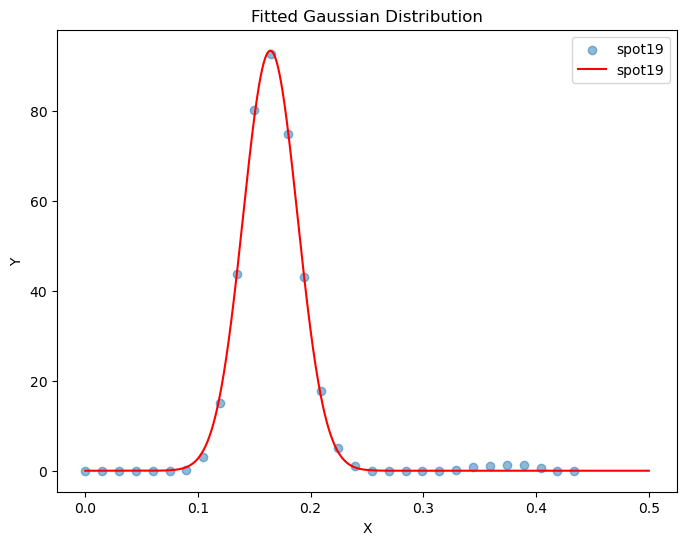

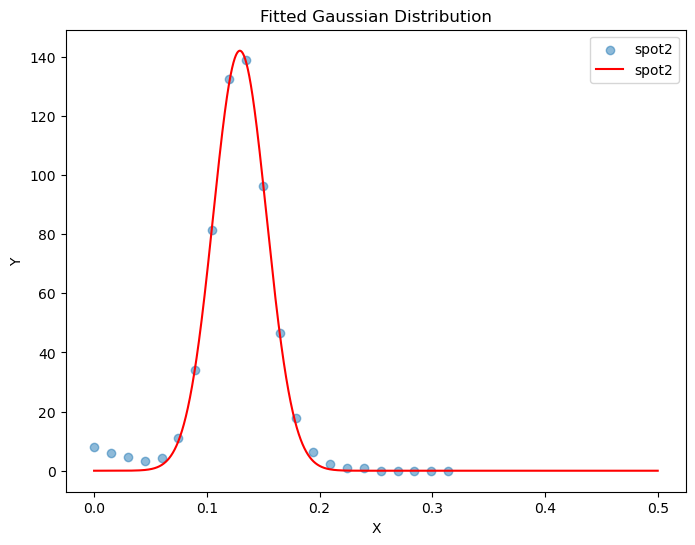

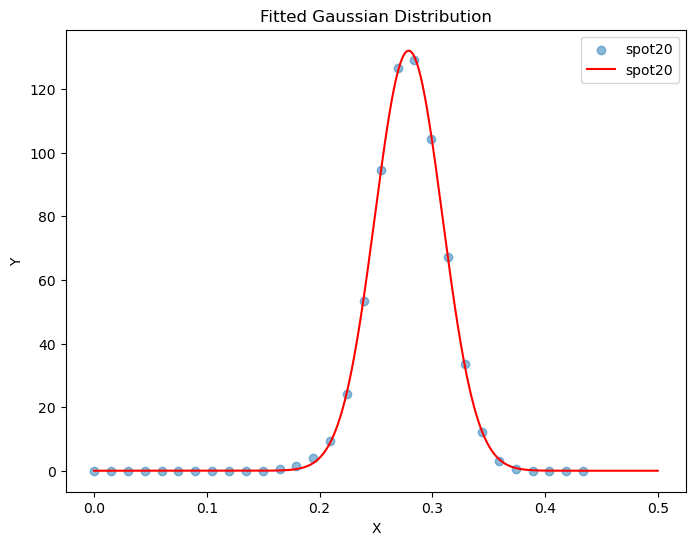

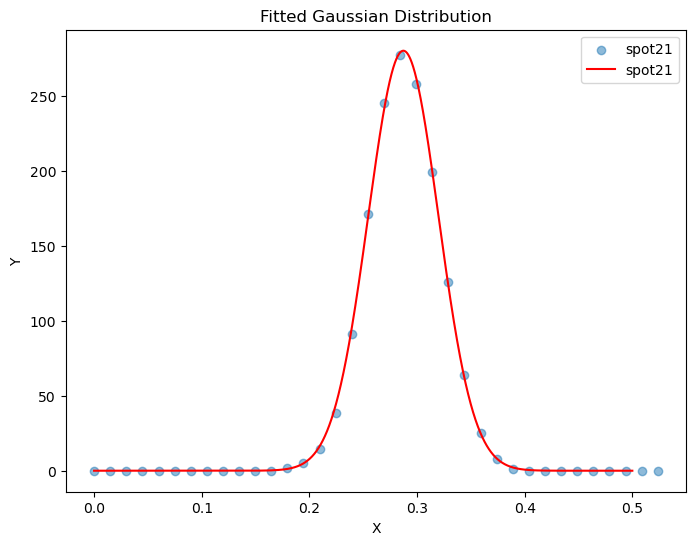

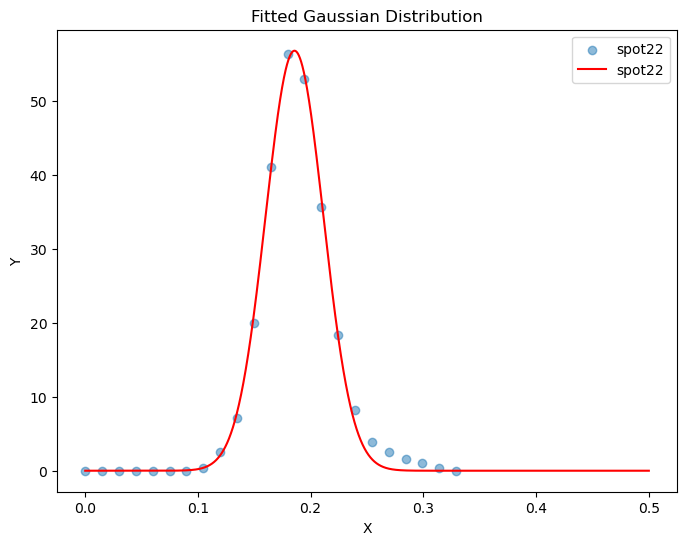

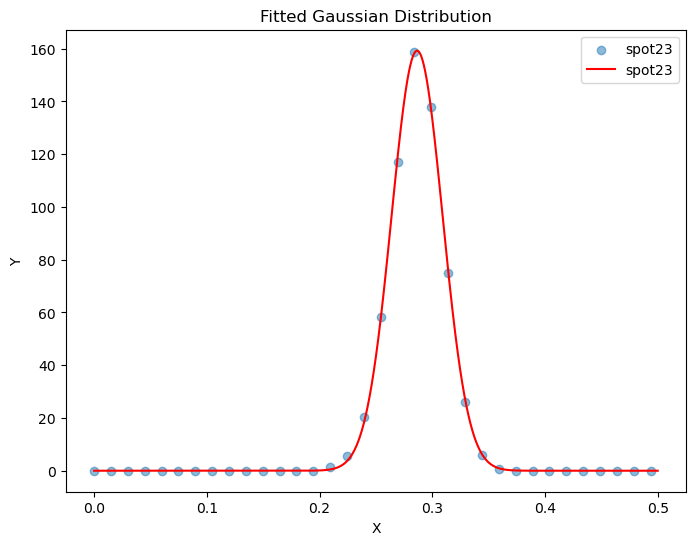

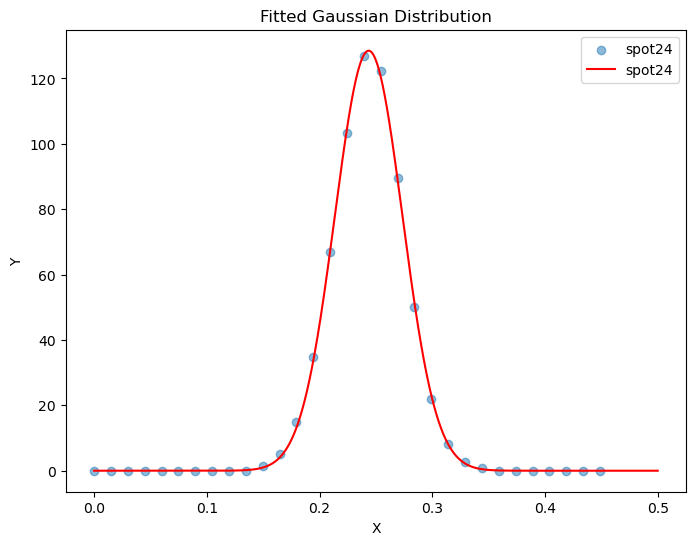

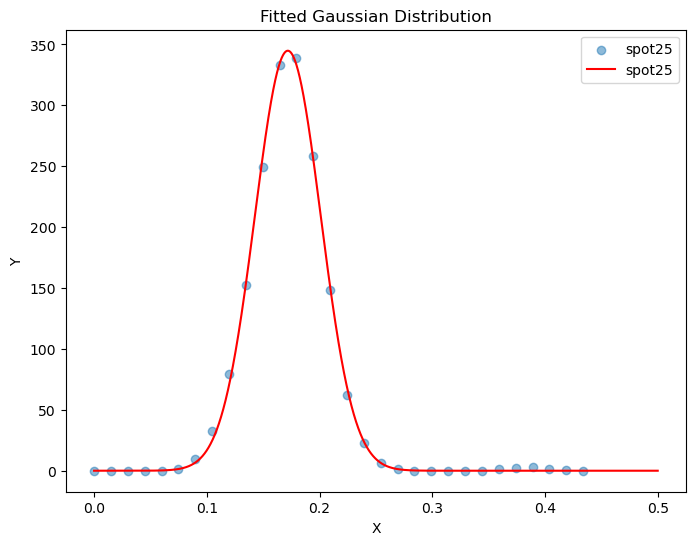

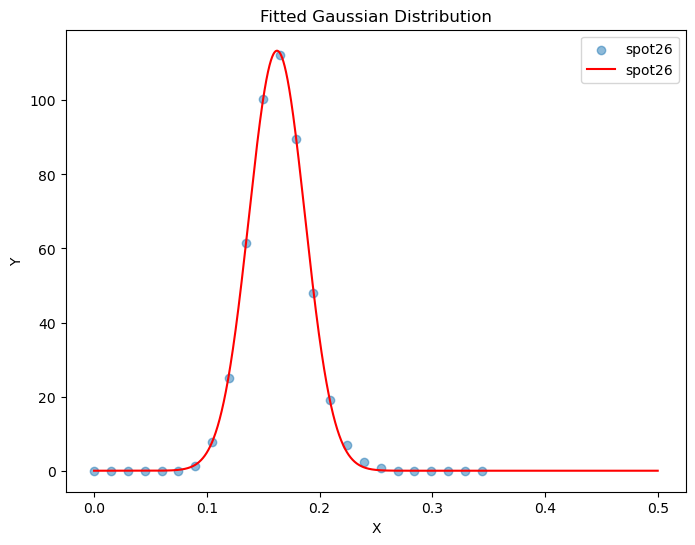

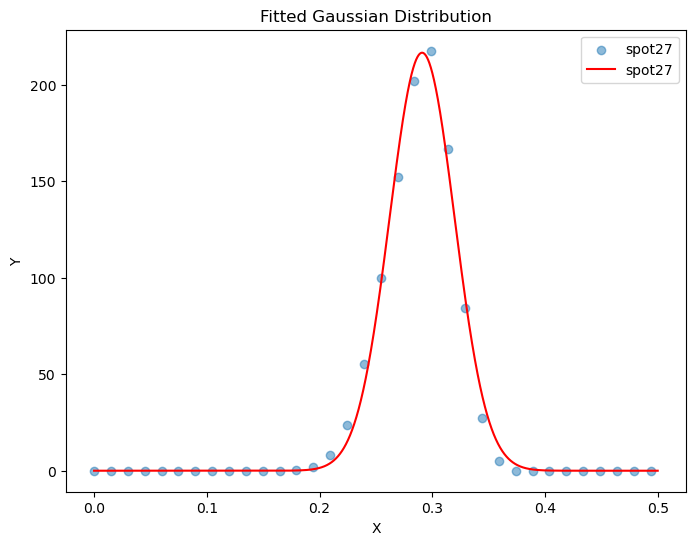

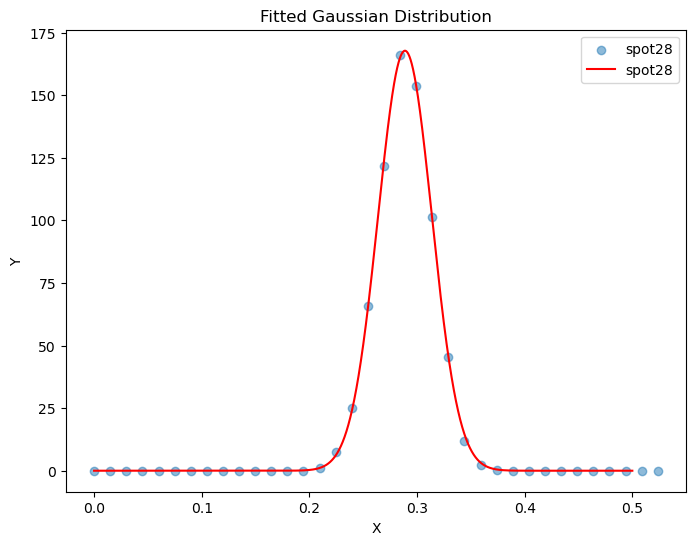

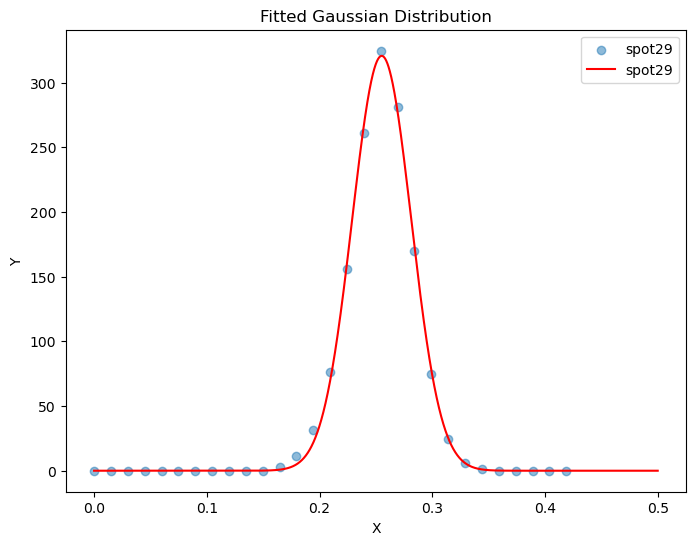

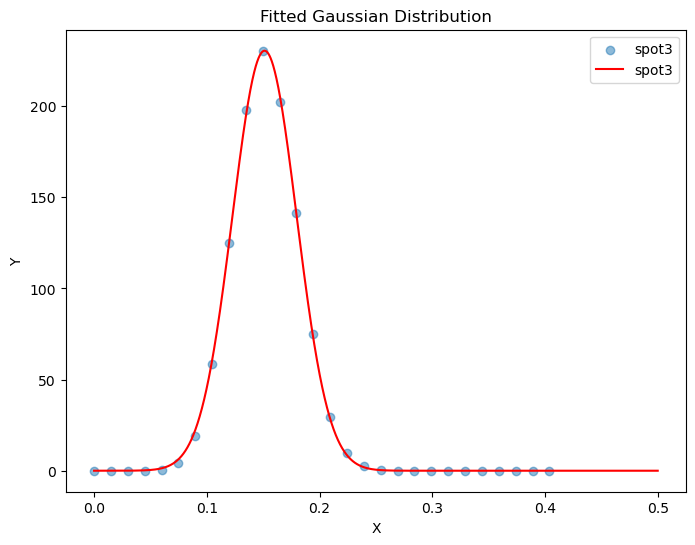

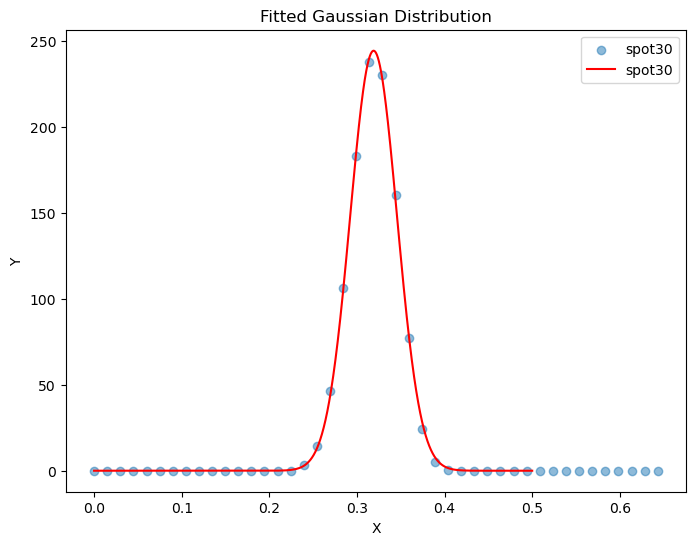

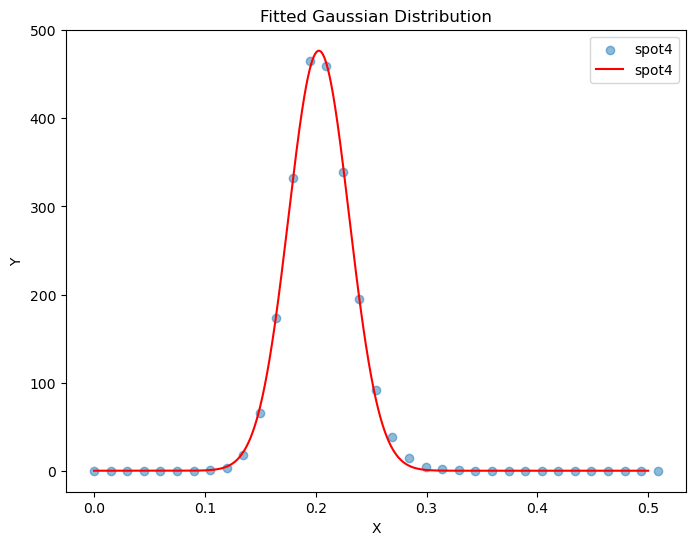

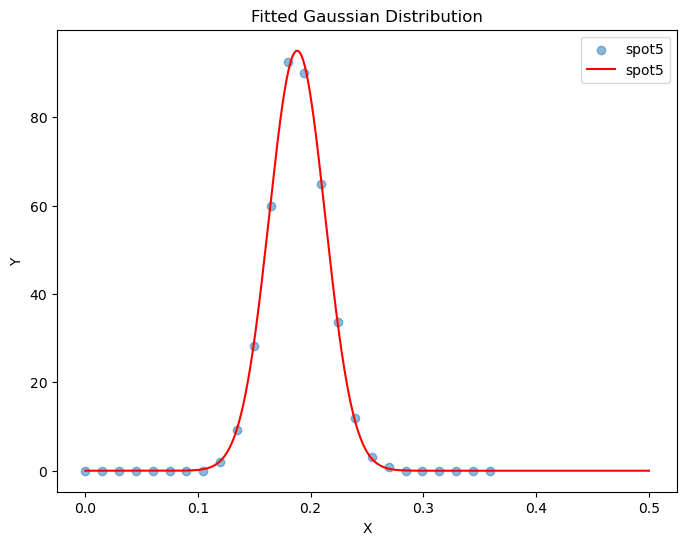

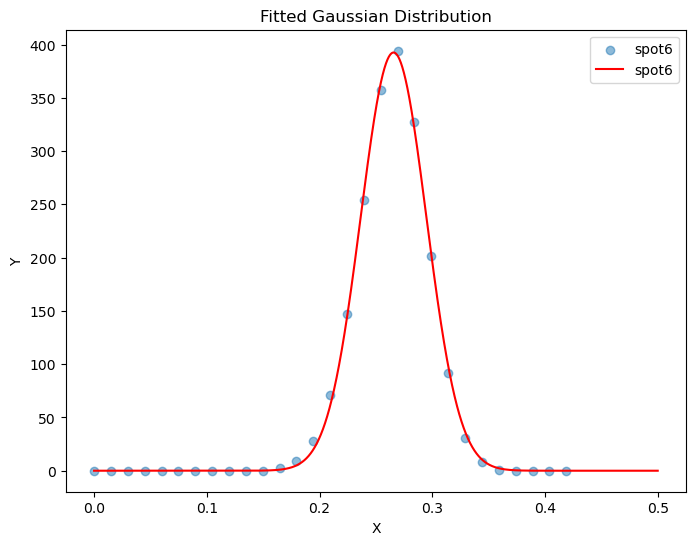

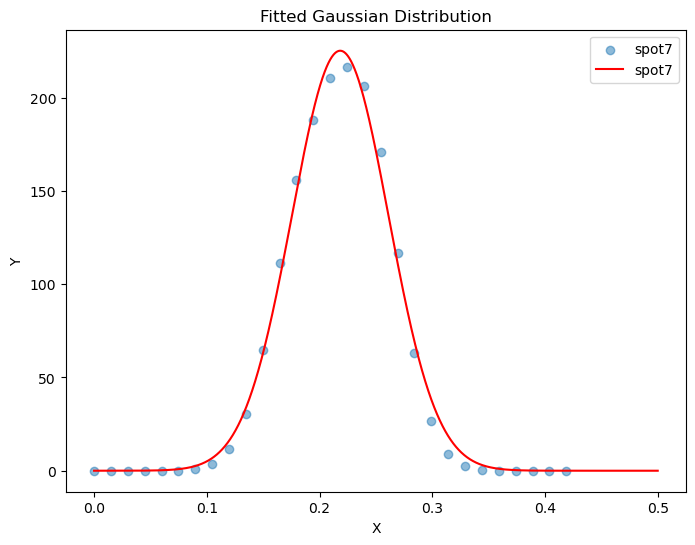

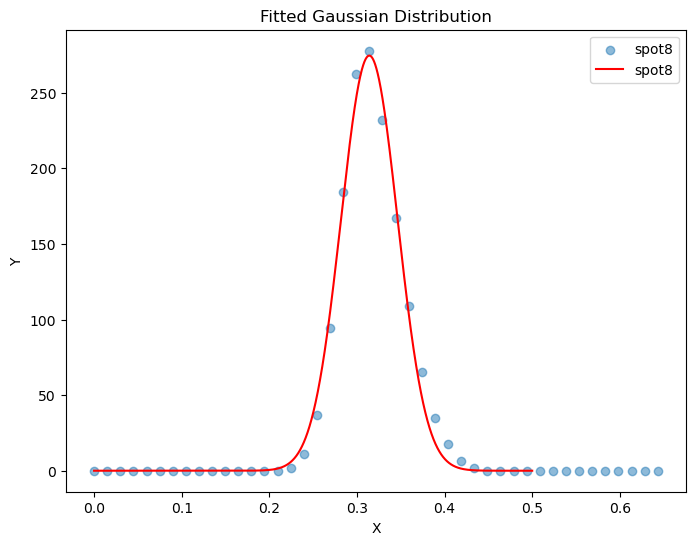

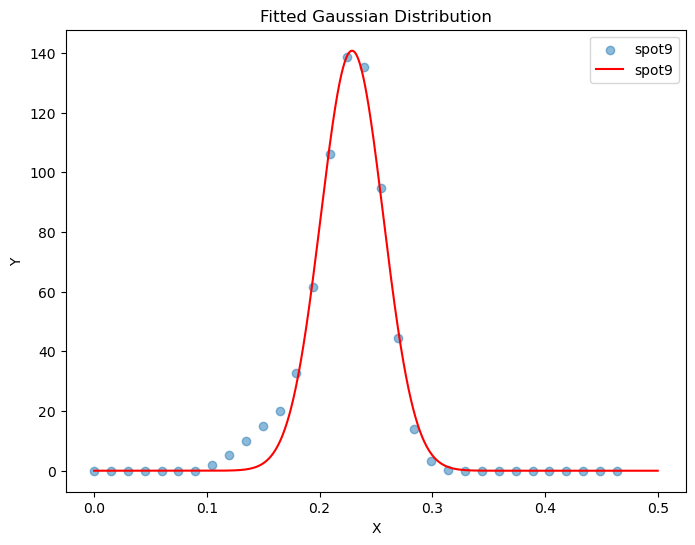

In [99]:
dfy=[]
dx=[]
for cell, subset_df in all:
    x_data = subset_df['Distance_(microns)']
    y_data = subset_df['Gray_Value']
    spot =subset_df['cell']
    initial_guess = [2000, 0.2, .40]
    x_plot = (np.linspace(0,.5,4000))
    
    x_plot, y_plot, params, A_fit, sigma_fit=fitting(x_data, y_data, initial_guess, spot)
    resolution=fwhm(sigma_fit)
    print(resolution)
    dx.append(cell)
    dfy.append(resolution)
    #dfys=pd.concat(dfy, cell)
#dfy['res (nm)']=resolution    

In [100]:
column=['resolution (nm)']#,'cell_spot']
#dfy_x=pd.DataFrame(dfy, columns=column)
dfy_x=pd.DataFrame({'res (nm)':dfy, 'spot':dx})
dfy_x
#dfy_x[]

,res (nm),spot
0,71.419301,spot1
1,73.749133,spot10
2,68.062743,spot11
3,53.514876,spot12
4,50.491333,spot14
5,66.132265,spot15
6,72.803792,spot16
7,50.752985,spot17
8,71.697193,spot18
9,56.814039,spot19


In [94]:
print(np.mean(dfy_x['res (nm)']))
print(statistics.stdev(dfy_x['res (nm)']))

95.76759582431768
21.37644341429477


In [7]:
all_spots

NameError: name 'all_spots' is not defined

In [ ]:
spot=['Spot4'] #1','Spot2','Spot3','Spot4']

In [ ]:
x_data = all_spots['Distance_(microns)']
y_data = all_spots['Gray_Value']
initial_guess = [850, 0.2, .40]
x_plot = (np.linspace(0,.4,4000))

In [ ]:
spot=['Spot4','Spot2'] #1','Spot2','Spot3','Spot4']
dfy=pd.DataFrame()

for i in spot:
    x_plot, y_plot, params, A_fit, sigma_fit=fitting(x_data, y_data, initial_guess)
    resolution=fwhm(sigma_fit)
    dfy['res (nm)']=resolution
res_vals=pd.concat(dfy)

In [ ]:
Resolution_Measure(x_plot, y_plot, params, 1899, 1904)

In [ ]:
# fit=[]
# for cell in spots:
#     x_data = cell['Distance_(microns)']
#     y_data = cell['Gray_Value']
#     initial_guess = [850, 0.2, .40]  # Initial parameter guess [A, mu, sigma]
#     params, covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# # Extract the fitted parameters
#     A_fit, mu_fit, sigma_fit = params


#     plt.figure(figsize=(8, 6))
#     plt.scatter(x_data, y_data, label="Data", alpha=0.5)
#     plt.plot(x_plot, gaussian(x_plot, A_fit, mu_fit, sigma_fit), label="Fit", color='red')

#     plt.title("Fitted Gaussian Distribution")
#     plt.xlabel("X")
#     plt.ylabel("Y")
#     plt.legend()
#     plt.show
    
# fit
#     #print(x_data)

In [ ]:

def Resolution_Measure(params):
    x=x_plot
    y=gaussian(x_plot, A_fit, mu_fit, sigma_fit)


    column=['x','y']
    data={'x':x, 'y':y}
    df=pd.DataFrame(data)
    Half=df[(df['y'] > 455) & (df['y'] < 458)]
    HW2=Half.iloc[1,0]
    HW1=Half.iloc[0,0]

    Resolution=HW2-HW1

    return Resolution

In [ ]:
for cell in spots:
    x=x_plot
    y=gaussian(x_plot, A_fit, mu_fit, sigma_fit)


    column=['x','y']
    data={'x':x, 'y':y}
    df=pd.DataFrame(data)
    Half=df[(df['y'] > 455) & (df['y'] < 458)]
    HW2=Half.iloc[1,0]
    HW1=Half.iloc[0,0]

    Resolution=HW2-HW1
    print(Resolution)

In [ ]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))



initial_guess = [850, 0.2, .40]  # Initial parameter guess [A, mu, sigma]
params, covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Extract the fitted parameters
A_fit, mu_fit, sigma_fit = params


plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label="Data", alpha=0.5)
plt.plot(x_plot, gaussian(x_plot, A_fit, mu_fit, sigma_fit), label="Fit", color='red')

plt.title("Fitted Gaussian Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x_data = Res['Distance_(microns)']
y_data = Res['Gray_Value']

initial_guess = [850, 0.2, .40]  # Initial parameter guess [A, mu, sigma]
params, covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Extract the fitted parameters
A_fit, mu_fit, sigma_fit = params

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label="Data", alpha=0.5)
plt.plot(x_plot, gaussian(x_plot, A_fit, mu_fit, sigma_fit), label="Fit", color='red')

plt.title("Fitted Gaussian Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show

In [ ]:
x=x_plot
y=gaussian(x_plot, A_fit, mu_fit, sigma_fit)
print(y)

In [ ]:
column=['x','y']
data={'x':x, 'y':y}
df=pd.DataFrame(data)
Half=df[(df['y'] > 455) & (df['y'] < 458)]
HW2=Half.iloc[1,0]
print(HW2)
HW1=Half.iloc[0,0]
print(HW1)
Resolution=HW2-HW1
Resolution

In [ ]:
HW2=Half.iloc[1,0]
print(HW2)
HW1=Half.iloc[0,0]
print(HW1)
Resolution=HW2-HW1
Resolution

In [ ]:
M=A_fit
M/2